# Chapter 3. 웹 스크래핑
토이 프로젝트 등에서 접할 수 있는 데이터는 대개 테이블 형태로 정갈하게 정리되어 웹 상에서 csv 파일 등의 형태로 접할 수도 있습니다. 개중에 특히 유명한 붓꽃(iris) 데이터, 보스턴 집값 데이터, 위스콘신 대학교 유방암 데이터는 아예 사이킷런(scikit-learn) 등의 라이브러리에서 자체적으로 내장해놓고 제공하기도 하니까요.  
그러나 안타깝게도 절대다수의 데이터는 csv 형태로 제공되지 않은 채 웹 상에 온갖 ~~별안간 희한하고도 기이한~~ 형태로 흩어져 존재하기 때문에 필요한 데이터를 구할 수 없을 때는 발품을 팔아가며 데이터를 수집해야 합니다. 게다가 어렵게 데이터를 수집한다 하더라도 우리가 원하는 형태(예컨대 테이블 형태)로 변환하려면 수집 후에도 이런저런 후처리를 거쳐야 합니다. 심지어 이런 데이터는 절대다수가 결측치를 포함하는 등 구멍이 숭숭 뚫려 있기까지 합니다. ~~데이터 직무 절망편~~  
따라서 우리는 인터넷에 흩어져 있는 수많은 데이터를 자동으로 수집하고, 이를 가공하는 방법론에 대해서도 어느 정도 이해하고 넘어갈 필요가 있습니다. 이번 장에서는 웹 크롤링 또는 웹 스크래핑으로 불리는 이 분야의 테크닉을 소개하겠습니다.  

> <span style="background-color:red">CAUTION</span></br>
웹 스크래핑 및 웹 크롤링을 통한 정보의 수집은 일반적으로 개인 소장까지만을 허용하고 있으며, 이를 넘어서더라도 학술적 연구 또는 비영리적 이용까지 허용되는 것이 일반적입니다. 그러나 이렇게 수집된  정보를 데이터 생산자 및 그 저작권 소유자의 허가 없이 배포할 경우, 특히 영리적인 목적의 배포를 시도할 경우 데이터의 원 출처가 지정한 라이선스에 따라 민/형사상의 책임을 질 수도 있습니다. <span style='color:red'>웹 스크래핑으로 수집한 정보를 취급할 때는 사용 목적과 데이터의 원 소유자 등을 종합적으로 고려하여 그 사용 범위를 신중하게 선택해야 하며, **이를 준수하지 않았을 때 발생할 수 있는 법적/사회적 손실은 본 교육과정에서 책임지지 않습니다.**</span>

## 3.1 웹 개요
우리는 인터넷과 웹을 혼동해서 사용하고는 합니다. 둘을 엄밀하게 구분해보자면 아래와 같습니다.
* 인터넷: 컴퓨터 네트워크 통신망
* 웹: 인터넷 상에서 동작하는 서비스의 일종  

우리가 이 둘을 혼동해서 사용하는 이유는 그만큼 인터넷 서비스에서 웹의 영향력이 압도적이기 때문일 겁니다.
### 3.1.1 웹 브라우저
모든 웹은 HTML이라는 언어로 작성됩니다. HTML은 태그라는 단위로 명령어를 구분하며, 웹 크롤링과 스크래핑에서는 이 태그를 어떻게 식별하고 활용하느냐가 정확한 정보를 긁어오는 데 중요한 역할을 담당합니다.  
한편, HTML로 작성된 웹을 그 상태로 그대로 읽는 사람은 없기 때문에, 이걸 우리가 아는 웹 사이트의 형태로 변환해서 출력하는 프로그램이 있어야 합니다. 이를 **웹 브라우저**(web browser)라고 하며, 대표적인 예로는 크롬, 사파리, 파이어폭스, 웨일, 엣지, 그리고 ~~지금은 고인이 되신~~ 인터넷 익스플로러 등이 있습니다.
### 3.1.2 속성으로 배우는 HTML/CSS
앞서 말했듯이 모든 웹은 HTML로 구성되기 때문에, 그 문법의 핵심을 이해하지 못하면 웹 크롤링의 정수를 절반도 이용하지 못할 불상사가 벌어질 수 있습니다. 이 챕터에서 정말 간단하게만 알아보고 가도록 하겠습니다.
#### 3.1.2.1 HTML 구조
앞서 말한 것과 HTML은 태그라는 단위로 구분됩니다. 정확히는 태그로 감싸진 속성과 내용들의 모음이라고 볼 수 있습니다.  
```HTML
<p class="para">TCPschool.com</p>
```  
위 태그에서 `<>`으로 묶인 것을 태그라고 부르며, html은 맨 앞의 시작 태그와 맨 끝의 종료 태그로 묶어서 구성됩니다. 시작 태그의 맨 앞 글자는 **태그 이름**이며, 그 다음에 오는 `class`는 태그의 **속성**입니다. 등호 뒤에 쌍따옴표로 묶인 것은 **속성값**입니다. 종료 태그의 태그 이름 앞에는 슬래쉬(`/`)가 붙어서 태그가 종료됨을 알려야 합니다. 마지막으로 두 태그 사이에 들어간 것들은 출력할 **내용**이 되겠습니다.
#### 3.1.2.2 태그 이름
태그의 종류와 기능은 아래와 같습니다. 지금 여기서 다 이해하고 넘어갈 필요는 없으니 아래 표를 참고해서 이용하시면 되겠습니다. 참고로 마크다운 문법에서도 일부 태그(특히 `span` 태그)가 똑같이 적용되니, 블로그나 깃허브 readme를 작성할 때도 요긴하게 사용할 수 있습니다!  
~~대표적으로 이번 문서 맨 위에 있는 경고문은 `span` 태그의 기능을 십분 활용한 예시가 되겠습니다.~~ 더블클릭해서 뜯어보면 span 태그로 둘러싸여 있습니다.  

|태그|설명|사용 예|
|---|---|---|
|`h1`~`h6`|제목 입력. 숫자가 커질수록 작은 제목입니다.|`<h1>짱큰 제목</h1>`|
|`p`|하나의 문장 입력|`<p>이것은 문장입니다. 문희장 교수님 잘 계시죠?</p>`|
|`div`|박스 형태의 구역 설정. block 요소로, 다른 태그들이 div 안에 모여있는 구조를 취합니다.|`<div><h3>소제목</h3><p>내가 왜 스터디를 하자고 해 가지고</p></div>`|
|`span`|줄 형태의 구역 설정. inline 요소로, 독립적으로 사용되지 않고 p 태그 안에 span 태그가 들어갑니다.|**위에 경고문 보고 와요.**|
|`img`|이미지 입력 태그. 속성명은 src, 속성값은 이미지의 url 주소. 종료 태그가 없는 종류의 태그입니다.|`<img src="/img 주소.png" alt="이미지가 없을 때 대신 출력할 문장">`|
|`a`|하이퍼링크 추가.|`<a href="링크 주소">HTML 링크</a>`|
|`ul`|unordered list의 약자로, 기호로 된 리스트.|`<ul><li>기호</li></ul>`|
|`ol`|ordered list의 약자로, 순서가 있는 리스트.|`<ol><li>1번</li></ol>`|  

#### 3.1.2.3 속성명
html은 수많은 태그로 이루어져 있는 데다가 동일한 태그가 수도 없이 많이 사용됩니다. 그래서 각각의 태그를 구분해주기 위해서 속성을 부여해줍니다. 각 태그별로 부여받을 수 있는 속성은 다양하지만 필히 알아둬야 할 속성 2가지를 꼽자면 id와 class가 있습니다.  
* id: 하나의 웹페이지 당 하나씩만 쓸 수 있는 고유한 이름. `<태그이름 id="속성값>` 형태로 쓰입니다.
* class: 비슷한 형태를 가진 요소에 여러 번 사용할 수 있는 이름. `<태그이름 class="속성값>` 형태로 쓰입니다.  

속성값과 내용은 프로그래머가 정해주기 나름이니, 크롤링 단계에서 주의 깊게 들여다 봅시다.

#### 3.1.2.4 CSS 구조
CSS는 html로 만들어진 화면을 꾸며주는 역할을 합니다. 특정 태그를 지목해서 글자색, 크기, 폰트 크기, 배경색과 같은 속성값을 넣어주는 것입니다. 이때 CSS가 태그를 지목하는 규칙을 알게 되면, 우리가 원하는 데이터를 감싸고 있는 태그를 지목해서 그 안의 데이터를 가져올 수 있습니다.  
![CSS 구조](image.png)  
CSS 코드는 위와 같이 선택자와 선언부로 구성됩니다. 여기서 우리는 선택자에 주목해야 합니다.  
|분류|설명|
|---|---|
|태그 선택|특정 태그를 선택|
|아이디 선택|id='속성값'인 태그 선택|
|클래스 선택|class='속성값'인 태그 선택|
|태그 + 아이디 선택|특정 태그 중 id가 '속성값'인 태그 선택|
|태그 + 클래스 선택|특정 태그 중 class가 '속성값'인 태그 선택|  

이 선택자를 후술할 라이브러리들의 메서드 안에 넣으면 원하는 동작을 수행하거나 데이터를 가져올 수 있습니다. `selenium`을 활용한 예시는 아래와 같은데(구 버전 기준이지만 `find_element`와 `find_elements`의 차이는 동일합니다.), 자세한 사항은 셀레늄 파트에서 다루겠습니다.  
```Python
driver.find_element_by_css_selector('#query')
driver.find_elements_by_css_selector('#query')
```

### 3.1.3 정적/동적 웹 페이지
웹 페이지는 정지해있는 정적(static) 웹과 구성 요소가 움직이고 변화하는 동적(dynamic) 웹으로 구분됩니다.

#### 3.1.3.1 정적 웹 페이지
웹 서버에 미리 저장된 파일이 있는 그대로 전달되는 웹 페이지입니다. 이 특성 때문에 크롤링을 할 때 URL 주소 외에는 추가적인 정보가 필요하지 않습니다.

#### 3.1.3.2 동적 웹페이지
url만으로는 들어갈 수 없는 웹페이지를 말합니다. 혹시 들어가지더라도 url의 변화가 없는데도 실시간으로 내용이 계속해서 추가되거나 수정된다면 동적 웹 페이지입니다. 여기서 무언가를 클릭해서 페이지가 변경되는 것은 다른 경우입니다.  
대표적인 예시로는 네이버 지도가 있습니다. 보고 있는 위치에 따라 출력 결과와 URL 주소가 실시간으로 변화하는 것을 볼 수 있습니다. 또는 스크롤을 내리면 계속 새로운 영상이 나타나는 유튜브를 예로 들 수 있겠습니다.

#### 3.1.3.3 웹 특성에 따른 정보 수집
어떤 웹 페이지가 정적이냐 동적이냐에 따라 사용해야 하는 파이썬 패키지가 달라집니다. 표로 정리하면 아래와 같습니다.  
|특성|정적 수집|동적 수집|
|:---:|:---:|:---:|
|사용 패키지|`requests`, `urllib`|`selenium`|
|수집 커버리지|정적 웹 페이지|정적/동적 웹 페이지|
|수집 속도|빠름 (별도 페이지 조작 필요 X)|상대적으로 느림|
|Parsing 패키지|`BeautifulSoup`|`BeautifulSoup`, `selenium`|

# 3.2 정적 웹 크롤링 - `requests`와 `BeautifulSoup`
정적 웹 크롤링의 과정은 간단합니다.
1. 원하는 웹페이지의 html 문서를 다 긁어온다.
2. 긁어온 html 문서를 파싱(parsing)한다.
3. 파싱한 html 문서에서 원하는 정보를 빼내서 사용한다.  

관련 패키지를 하나씩 살펴보겠습니다.
### 3.2.1 `requests` 개요
html 문서를 가져올 때 사용하는 패키지로, 복잡한 http 요청과 쿠키, 헤더를 아주 잘 처리해줍니다. 아나콘다 등에 기본적으로 깔려 있어서 파이썬 기본 패키지로 생각하기 쉽지만, 엄연히 서드파티 패키지(http://www.python-requests.org)이기 때문에 pip를 이용한 별도의 설치가 필요합니다.  
`pip install requests`  
> <span style='background-color:blue'>여담</span></br>
파이썬에도 자체 내장된 `urllib`라는 패키지가 있기는 합니다. 그런데 `requests` 라이브러리를 제작한 케네스 라이츠(Kenneth Reitz)는 `urllib`를 썩 좋게 본 것 같지 않습니다.
>> "파이썬의 표준 `urllib2` 모듈은 필요한 HTTP 기능을 거의 제공하지만, 이제 너무 뒤떨어졌습니다. 이 API는 과거에, 과거의 웹을 위해 만들어졌습니다. `urllib2`를 사용하려면 정말 단순한 일 하나만 하려 해도 할 일이 너무 많고, 심지어 메서드 오버라이드까지 필요할 때도 있습니다.</br> API를 이렇게 만들면 안 됩니다. 파이썬과 어울리지 않습니다."

In [1]:
import requests

In [2]:
url = "https://www.naver.com"

In [3]:
response = requests.get(url)

In [5]:
html_text = response.text

In [6]:
html_text # 파싱이 되지 않은 raw html 텍스트

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

### 3.2.2 `BeautifulSoup` 개요
이름부터가 심상치 않은 이 라이브러리는 루이스 캐럴의 소설 『이상한 나라의 앨리스』에 수록된 동명의 시에서 이름을 따왔습니다. 길고 정신없는 html 문서를 잘 정리된 형태로 만들어주는 파싱 작업을 돕는 라이브러리입니다.  
`BeautifulSoup`는 잘못된 HTML을 수정하여 쉽게 탐색할 수 있는 XML 형식의 파이썬 객체로 변환하는 기능을 탑재하고 있습니다. 이 덕분에 구조가 복잡하거나 골치 아픈 웹을 탐색할 때 매우 유용합니다. ~~실제로 써보면 이게 얼마나 **아름다운** 기능인지 뼈저리게 느낄 수 있습니다.~~  

### 3.2.2.1 설치
현재 배포 중인 버전은 BeautifulSoup 4(줄여서 bs4)입니다. 아직 설치가 안 되어 있다면 아래 명령어를 터미널에 입력해서 설치하도록 합시다!  
`pip install beatuifulsoup4`  
정상적으로 설치되었다면 아래와 같이 임포트할 수 있습니다.

In [7]:
from bs4 import BeautifulSoup as bs

기왕 이렇게 된 거 일단 이걸로 뭔가를 긁어와보도록 하죠. 방금 `requests`로 긁어온 네이버 url을 사용하도록 하겠습니다.

In [8]:
html = bs(html_text, 'html.parser')

In [13]:
html

 <!DOCTYPE html>
 <html class="fzoom" lang="ko"> <head> <meta charset="utf-8"/> <meta content="origin" name="Referrer"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <title>NAVER</title> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 

In [9]:
print(html.h1)

<h1 class="search_logo" id="special-input-logo"></h1>


여기서 주목할 것은 페이지에 있는 첫 번째 태그 `<h1>`만 반환한다는 사실입니다. 원칙상 페이지 하나에 `<h1>` 하나만 쓰는 것이 맞지만, 모든 웹페이지가 그 규칙을 지키는 것은 아닐 뿐더러, 그 태그가 우리가 찾는 태그라는 보장도 없음을 명심해야 합니다.  
한편, 형식을 제대로 지키지 않아 계층 구조가 잘못된 ~~지저분한~~ 태그를 긁어야 할 때도 있습니다. 이럴 때는 `html.parser`를 사용하면 아무 것도 긁어오지 않기 십상이기 때문에 XML 형식으로 긁어오는 방법이 필요합니다. 아래 코드와 같이 인수를 변경해줍니다.  
> <span style="background-color:green">Tips and tricks</span></br>사전에 먼저 터미널에서 lxml을 설치해주셔야 진행할 수 있습니다!  `pip install lxml`  


In [11]:
html_lxml = bs(html_text, 'lxml')

In [12]:
html_lxml

<!DOCTYPE html>
<html class="fzoom" lang="ko"> <head> <meta charset="utf-8"/> <meta content="origin" name="Referrer"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <title>NAVER</title> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양

이 방식은 html parser에 비해 속도가 조금 더 빠르다고는 하지만, 어차피 웹 크롤링 분야에서 속도는 네트워크 자체의 속도에 좌우되기 때문에 이게 큰 장점이라 하기도 어렵습니다. 게다가 lxml은 따로 설치해야 하며, Visual Studio C++ builder와 같은 서드파티 C언어 라이브러리가 있어야 제대로 동작하기 때문에 범용성 있게 사용하기에도 제약이 따르는 편입니다.

## 3.2.3 BeautifulSoup 실전 - find/select
> 정적 웹 크롤링의 핵심 단계입니다. 능수능란하게 정보를 빼오기 위해서는 이 스킬을 반드시 익히셔야 합니다.  

`BeautifulSoup` 패키지에는 `find` 함수만 해도 총 12개가 있습니다. 이 중 우리는 `find()`와 `find_all()`이라는 두 가지 메서드만 기억하면 됩니다. 전자는 하나만 찾고, 후자는 모두 다 찾는 것입니다. 참고로 요소 한 가지만 찾는 `find()` 함수는 가장 첫 번째 것만 가져오게 됩니다.  
예를 들어서 목표 태그가 아래와 같이 주어졌다고 해봅시다.  
```HTML
<p class="para">파라미터</p>
<div id="zara">자라 보고 놀란 뭐시기</div>
```  
이러한 태그를 찾을 때는 아래와 같은 방식 중 하나로 찾을 수 있습니다.  
```Python
# 태그 이름으로 찾기
bs.find('p')

# 태그 속성(class)으로 찾기 - 2가지 형식
bs.find(class_='para') # 이 형식을 사용할 때는 class 다음에 언더바(_)를 꼭 붙여야 합니다.
bs.find(attrs = {'class':'para'}) 

# 태그 속성(id)으로 찾기 - 2가지 형식
bs.find(id='zara') 
bs.find(attrs = {'id':'zara'})

# 태그 이름과 속성으로 찾기
bs.find('p', class_='para')
bs.find('div', {'id' = 'zara'})
```  

마찬가지로 `select` 함수에서도 `select()`와 `select_one()` 메서드를 기억하면 됩니다. 전자는 `find_all()`처럼 전부 다 가져오는 개념이고, 후자는 `find()`처럼 하나만 가져오는 개념입니다. `select()`는 괄호 안에 CSS 선택자를 넣어서 원하는 정보를 찾는 것이 특징입니다.  
```Python
# a 태그의 class 속성명이 news_tit인 태그 
bs.select_one('a.news_tit')

bs.select('a.news_tit')

for i in titles: 
    title = i.get_text()
    print(title)
```

### 3.2.4 정적 웹 크롤링 예제
그럼 앞서 소개한 세 단계에 걸쳐서 정적 웹 크롤링을 해 보겠습니다.

In [14]:
import requests
from bs4 import BeautifulSoup as bs

In [36]:
# 검색할 키워드 입력
# VS Code에서 이 블록을 실행하면 VS Code 상단 가운데에 입력창이 표시됩니다.
# 주피터 노트북에서 실행하시면 블록 바로 아래에 입력창이 생성됩니다.
# 여기에 원하는 검색어를 입력하고 엔터를 누르면 됩니다.
# 저는 아시안게임을 검색했습니다.
query = input("검색할 키워드를 입력하세요: ")

In [37]:
query

'아시안게임'

In [38]:
# 네이버 검색 결과 페이지
url = f'https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query={query}'

In [39]:
url

'https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query=아시안게임'

In [40]:
response = requests.get(url)
html_text = response.text

In [41]:
soup = bs(response.text, 'html.parser')

In [42]:
soup

<!DOCTYPE html>
 <html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="아시안게임 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'아시안게임'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'아시안게임'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>아시안게임 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230914.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net

파싱이 되기는 했지만 우리는 아직 이 웹 페이지에 어떤 태그들이 있는지 완전히 알지 못하고, 그럴 수도 없습니다. 따라서 웹 페이지에서 개발자 도구로 들어간 뒤, 원하는 정보가 어떤 태그에 들어가 있는지 확인해야 합니다.  
방금 입력한 URL 주소로 들어간 후, F12를 눌러 개발자 도구로 들어갑니다.  
![개발자 도구](image-2.png)  
개막식 뉴스가 눈에 띄는 군요. 저 정보가 저장된 태그를 찾아보겠습니다. 개발자 도구 탭의 왼쪽 위를 보면 이렇게 생긴 아이콘이 있습니다.  
![검사할 페이지 요소 선택](image-3.png)  
이 아이콘을 클릭하거나 Ctrl + Shift + C를 누릅니다. 그런 다음, 추출을 원하는 부분을 클릭하면, 해당 부분의 html 태그를 개발자 도구에 띄워줍니다. 여기서는 기사 제목을 클릭하면 되겠죠?  
![태그 확인](image-4.png)  
이 태그의 속성을 확인해보니 `class="news_tit"`이라고 되어 있습니다. 이 선택자는 해당 페이지의 모든 뉴스 기사 제목이 공통으로 가지고 있는 class 이름입니다.
CSS 선택자를 알아냈다면 select 함수에 입력하여 원하는 부분의 html을 변수에 저장해준 후에, for 문과 .get_text( ) 함수를 이용해 주시면 됩니다.

In [43]:
news_titles = soup.select("a.news_tit")

In [44]:
for i in news_titles:
    title = i.get_text()
    print(title)

[아시안게임] SKT, 국가대표 응원 캠페인 운영
항저우 아시안게임 화려한 개막…친환경·디지털·스마트 눈길
北 인공기 게양 금지인데…아시안게임서 버젓이 '인공기 펄럭'
한 총리, 오늘 시진핑 주석 면담…항저우 아시안게임 출국
한국, 항저우 아시안게임 개막식 16번째 입장…구본길·김서영 공동기수
친환경·디지털·스마트…제19회 항저우 아시안게임 화려한 개막(종합)
北 인공기, 도핑 문제로 게양 금지인데…아시안게임 개회식 등장
여야, 항저우 아시안게임 대표선수단에 "선전 응원" 한목소리
한총리 “항저우 아시안게임 성공 기원” 習 “전략적 동반자 관계 발전”
[내일의 아시안게임] 개막 첫날부터 '골든 데이'…이강인은 첫 출격할까


같은 방식으로 뉴스의 링크를 가져와보겠습니다. 이번에는 속성을 가져오는 함수인 `.attrs['href']`를 사용합니다. `href` 속성은 방금 가져온 `news_titles` 변수에 이미 저장되어 있으므로 따로 가져올 필요 없이 반복문을 사용했습니다.

In [45]:
for i in news_titles:
    href = i.attrs['href']
    print(href)

https://www.yna.co.kr/view/AKR20230922125400017?input=1195m
https://www.hankyung.com/article/2023092325857
http://news.tvchosun.com/site/data/html_dir/2023/09/23/2023092390048.html
http://www.newsis.com/view/?id=NISX20230923_0002461718&cID=10301&pID=10300
https://news.jtbc.co.kr/article/article.aspx?news_id=NB12145429
https://www.yna.co.kr/view/AKR20230923041651007?input=1195m
https://biz.chosun.com/policy/politics/2023/09/24/AHGY7C4LHRG5JMK53KBUZEGJZI/?utm_source=naver&utm_medium=original&utm_campaign=biz
http://www.newsis.com/view/?id=NISX20230923_0002461872&cID=10301&pID=10300
https://www.mk.co.kr/article/10836533
https://www.yna.co.kr/view/AKR20230922072500007?input=1195m


뉴스 이미지를 추출할 때는 조금 더 손이 많이 갑니다. 이미지 다운로드를 위해 이미지 썸네일의 주소를 (아까와 같은 방식으로 추출해서) 리스트에 저장(`append`)해줍니다. 미리 이미지를 저장해둘 폴더를 만든 뒤, 해당 주소에 저장시켜주는 절차를 실행하겠습니다.  
참고로 이 코드에는 파이썬 기본 모듈인 `os`와 `urllib.request` 패키지를 임포트해오겠습니다.

In [46]:
import os
from urllib.request import urlretrieve

In [68]:
news_thumbnail = soup.select("img.thumb.api_get")
link_thumbnail = [] # 썸네일 주소를 저장할 리스트

> <span style='background-color:green'>Tips and Tricks</span></br>
위 예제처럼 클래스 이름에 띄어쓰기(스페이스바)가 들어간다면 띄어쓰기에 해당하는 위치에 마침표(`.`)를 찍어줘야 합니다. 위의 예제 코드처럼 클래스 명이 `thumb api_get`인 이미지 태그를 선택하려면, `img.thumb.api_get`라고 입력해주어야 합니다.  
>> 1. `img` 바로 뒤의 점(`.`)은 class를 나타냅니다. (만약 class가 아니라 id를 가져왔다면 `.` 대신 `#`이 들어감)
>> 2. `thumb` 바로 뒤의 점(`.`)은 띄어쓰기를 의미하며, 컴퓨터가 띄어쓰기를 인식하지 못하기 때문에 넣은 요소입니다.

In [69]:
news_thumbnail

[<img alt="[아시안게임] SKT, 국" class="thumb api_get" data-lazysrc="https://search.pstatic.net/common/?src=https%3A%2F%2Fimgnews.pstatic.net%2Fimage%2Forigin%2F001%2F2023%2F09%2F24%2F14214122.jpg&amp;type=ff264_180&amp;expire=2&amp;refresh=true" height="90" onerror="this.parentNode.style.display='none';" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" width="132"/>,
 <img alt="항저우 아시안게임 화" class="thumb api_get" data-lazysrc="https://search.pstatic.net/common/?src=https%3A%2F%2Fimgnews.pstatic.net%2Fimage%2Forigin%2F015%2F2023%2F09%2F23%2F4895492.jpg&amp;type=ff264_180&amp;expire=2&amp;refresh=true" height="90" onerror="this.parentNode.style.display='none';" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" width="132"/>,
 <img alt="北 인공기 게양 금지인" class="thumb api_get" data-lazysrc="https://search.pstatic.net/common/?src=https%3A%2F%2Fimgnews.pstatic.net%2Fimage%2Forigin%2F448%2F2023%2F09%2F23%2F429069.jpg&amp;type=ff264_

In [70]:
for img in news_thumbnail:
    link_thumbnail.append(img.attrs['data-lazysrc']) # 이미지 정보가 저장된 URL

In [65]:
path_folder = 'C:\\Users\\jktak\\OneDrive\\문서\\P\\pythonVScode\\MLStudyPlaydata\\basicTraining\\webScrapping_image'

In [60]:
# 폴더 생성 코드
# 폴더가 이미 존재한다면, 실행해도 폴더를 하나 더 만들거나 하지는 않고, 그냥 넘어갑니다.
if not os.path.isdir(path_folder):
    os.mkdir(path_folder)

In [71]:
# 이미지 파일 이름(초기값 0)
i = 0

In [72]:
for link in link_thumbnail:
    i += 1
    urlretrieve(link, path_folder + "\\" + f"{i}.png")

![썸네일](image-5.png)  
썸네일이 성공적으로 수집되었습니다.  

## 3.3 동적 웹 크롤링
### 3.3.1 Selenium 개요
> <span style="background-color:blue">들어가기 전에</span></br>본 강의자료는 셀레늄 4.11.2 버전에서 작성되었습니다.  

크롤링을 하다 보면 어떤 입력을 하거나, 특정 버튼을 눌러야 하는 상황이 발생합니다. 사람이 그러한 행동을 하는 대신 컴퓨터가 할 수 있도록 해주는 패키지가 `selenium` 패키지입니다. ~~게임 좋아하는 분들은 한 때 판을 쳤던 매크로와 다를 게 뭐냐는 생각을 하실 수도 있는데 **정확히 보셨습니다**.~~  
하지만 셀레늄에는 이것 말고도 웹 정보를 크롤링하는 기능이 탑재되어 있고, 실제로 동적 웹 사이트에서 크롤링을 할 일이 많은 분들은 셀레늄만 가지고 웹 크롤링을 하는 경우도 많습니다. ~~나쁘게 말하면 원툴이라고 하죠~~  
아직 설치하지 않았다면 아래 명령어로 일단 설치를 해줍시다.  
`pip install selenium`  

### 3.3.2 셀레늄 크롬 드라이버 사용법
셀레늄에 내장된 크롬 드라이버는 컴퓨터가 크롬 웹 브라우저를 다룰 수 있도록 해주는 프로그램입니다. 정확히는 코드를 실행시키면 구글로부터 다운을 받아오게 해주는 기능입니다. 아래 코드를 실행하면 자동으로 설치가 진행되니 별도로 설치할 필요는 없습니다.

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

In [2]:
driver = webdriver.Chrome()

In [3]:
driver.get("https://www.google.co.kr/") # 지정한 url로 이동
time.sleep(3) # 페이지가 완전히 로딩될 때까지 3초 대기

![웹드라이버](image-6.png)

이제 이 화면에서 원하는 화면 상태에 도달할 수 있도록 웹 브라우저를 조작해보겠습니다. 예를 들어, 유튜브 댓글을 모두 크롤링하려면 스크롤을 맨 아래까지 내려야겠죠? 댓글이 추가적으로 업데이트되는 상황도 고려해야 합니다. 이 조작을 셀레늄이 대신 행해줍니다. ~~이러니 매크로 소리를 듣지~~ 기본 조작 단계는 아래와 같습니다.  
1. 조작하려는 버튼이나 입력창의 html을 파악
2. 아래의 두 함수에 html 정보를 입력해 객체(버튼, 입력창 등) 선택
    * `find_element()`
    * `find_elements()`
3. 기능 동작 관련 메서드로 기능 조작
    * 클릭: `.click()`
    * 키 입력: `.send_keys()`

> <span style='background-color:green'>Tips and Tricks</span></br>설치되어 있는 셀레늄 버전에 따라서 객체 선택을 `find_element_by_css_selector()` 또는 `find_element_by_xpath()` 등 태그를 검색하는 기준으로 구분하기도 합니다. 본 강의자료는 최신 버전에 준하는 셀레늄이 설치되어 있다고 가정하고 진행합니다.

우리는 이 검색창에 원하는 키워드를 입력하고 검색하는 것이 목적입니다. 일단 검색창을 타겟팅해서 클릭을 해야 하니, 검색창의 태그부터 알아보겠습니다. 개발자 도구를 켜고 태그를 찾아봅니다.  
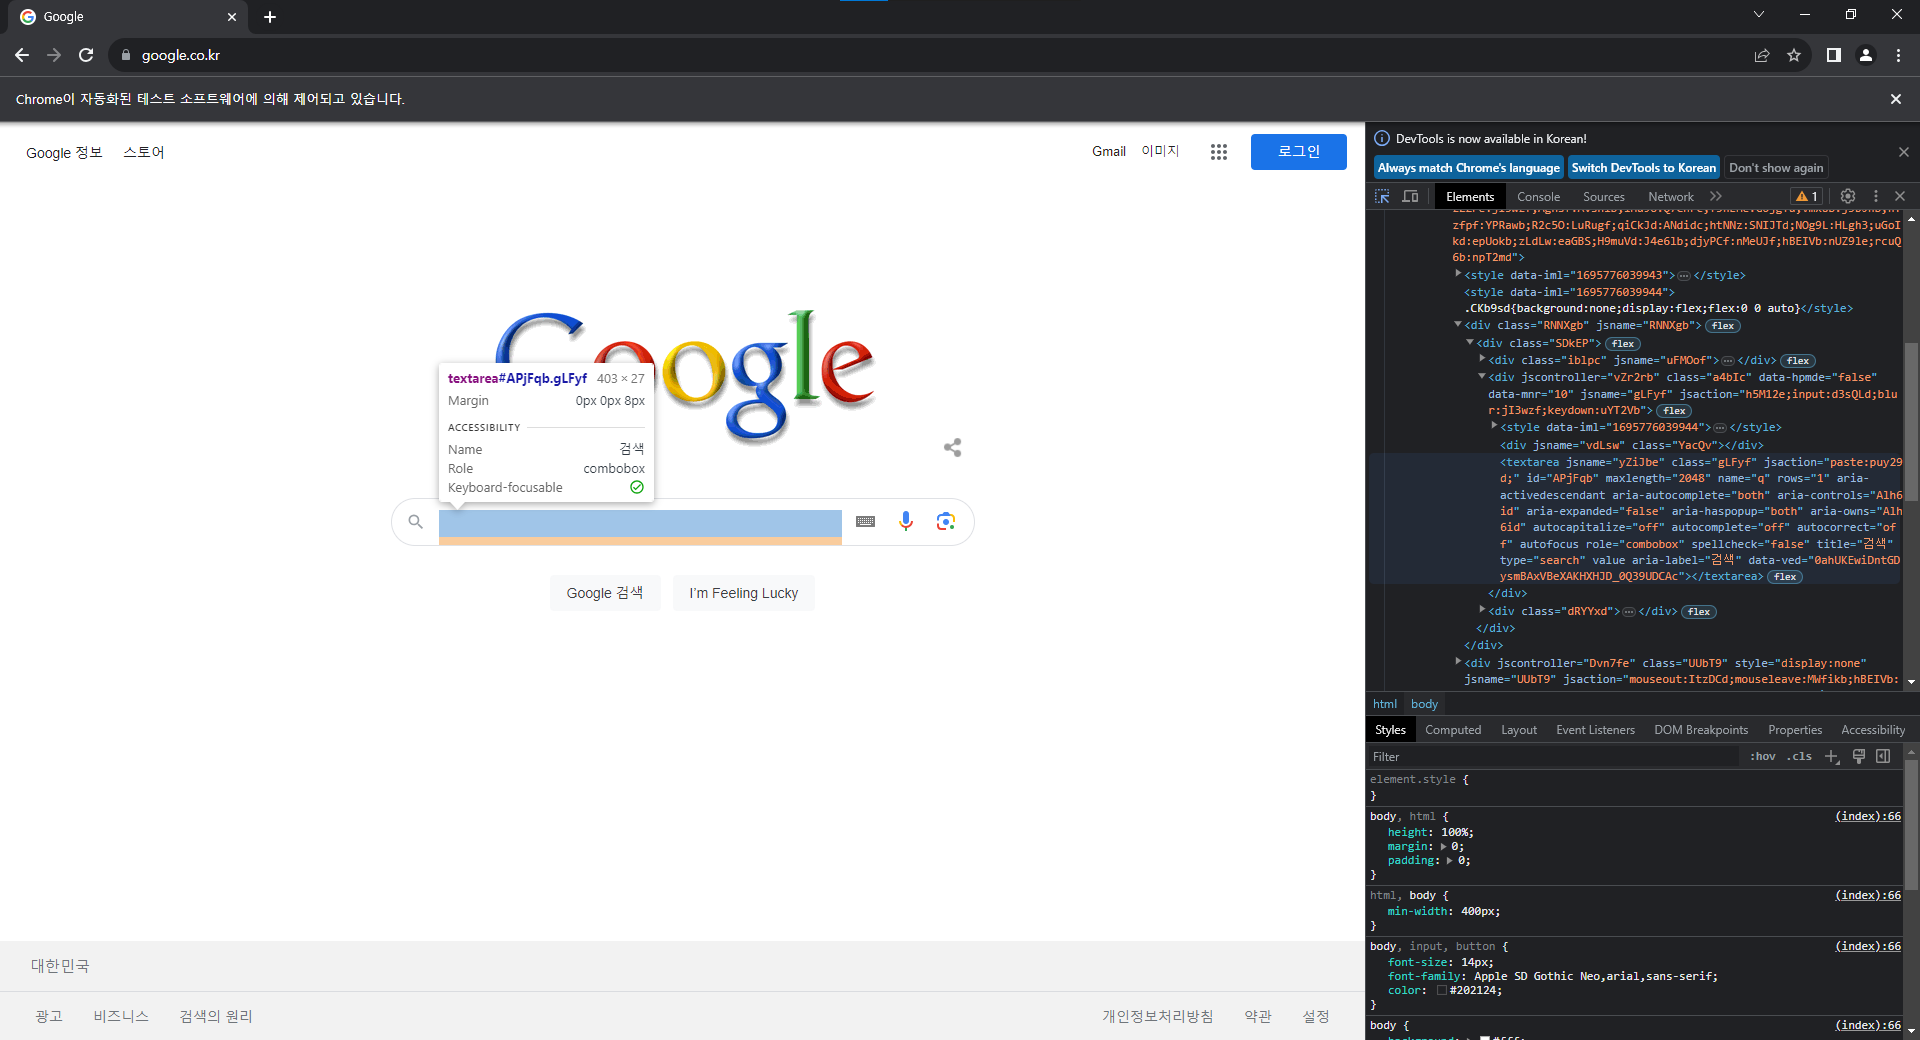  
> <span style='background-color:green'>Tips and Tricks</span></br>커서를 갖다 대면 비슷한 태그가 많아서 혼동될 수 있는데, 태그 아래쪽에 Keyboard-focusable이라는 키워드에 녹색 체크가 되어 있는 것을 볼 수 있습니다. 여기가 우리가 원하는 검색창의 위치입니다.

여기서 알아낸 클래스의 이름을 복사해 놓으세요. 이번 예제에서는 `gLFyf`가 해당되겠죠?  
그 다음으로 해줄 일은 셀레늄의 `find_element` 함수를 조작하는 것입니다. 위에서 가져온 선택자(`gLFyf`)를 괄호 안에 넣어서 크롬 드라이버가 알아먹을 수 있게 변환해주는 것입니다. 괄호 안에 태그를 어떤 기준으로 찾을 것이냐는 인수로 `By.CLASS_NAME`을 입력하고, 그 다음 인수로 선택자 `gLFyf`를 입력합니다.  
간혹, 태그 내에서 클래스 이름 등을 찾기 어려울 때는 해당 태그를 우클릭한 후, XPath 복사를 선택하는 방법도 있습니다. XPath는 태그의 경로를 알려주는 언어로서, 비직관적이지만 (컴퓨터 입장에서는) 특정 요소를 찾기 쉽게 해주는 장점이 있습니다.</br>![XPath 복사](image-7.png)  
이럴 때는 `find_element`의 괄호를 `By.XPATH, '//*[@id="APjFqb"]'`로 수정해야 합니다.

In [7]:
search_box = driver.find_element(By.CLASS_NAME, "gLFyf")
# search_box = driver.find_element(By.XPATH, '//*[@id="APjFqb"]')와 동일

크롬드라이버가 html을 찾았으니 이제 원하는 조작을 수행해야 합니다. 검색창을 클릭한 후, 우리가 원하는 키를 입력하도록 해 줍시다. 명령어 목록은 아래와 같습니다.  

|명령어|목록|
|:---|:---:|
|`Keys.ENTER`</br>`keys.RETURN`|엔터|
|`Keys.SPACE`|스페이스|
|`Keys.ARROW_UP`</br>`Keys.ARROW_DOWN`</br>`Keys.ARROW_LEFT`</br>`Keys.ARROW_RIGHT`|방향키 (상하좌우)|
|`Keys.BACK_SPACE`</br>`Keys.DELETE`|지우기(백스페이스)</br>지우기(delete)|
|`Keys.CONTROL`</br>`Keys.ALT`</br>`Keys.SHIFT`</br>`Keys.TAB`|자주 사용하는 기능 키 (Ctrl, Alt, Shift, Tab)|
|`Keys.PAGE_UP`</br>`Keys.PAGE_DOWN`|스크롤 업</br>스크롤 다운|
|`Keys.F1`~`Keys.F9`|Function 키(키보드의 F1, F2 등)|
|`Keys.EQUALS`</br>`Keys.ESCAPE`</br>`Keys.HOME`</br>`Keys.INSERT`|기타 등등|  

이 기능을 이용해서 추석을 검색해보겠습니다.

In [8]:
search_box.send_keys('추석') # 검색창에 검색어 입력
search_box.send_keys(Keys.RETURN) # 엔터키 입력 명령
time.sleep(1) # 1초간 대기

![추석 검색](image-9.png)  
성공적으로 검색이 되었습니다. 참고로 그림에서 구글 검색 버튼을 우리가 했던 방식으로 태그로 검색할 수도 있지만, 해당 부분을 `.click()` 명령어로 선택하는 방식도 가능합니다. 정 태그를 찾기 귀찮다면 이런 방법도 있으니 참고하시길...

### 3.3.3 셀레늄 실전 - 텍스트, 하이퍼링크, 이미지 가져오기
정적 웹 크롤링과 마찬가지로 셀레늄을 이용한 동적 웹 크롤링을 해보겠습니다. 순서는 아래와 같습니다.  
1. 키워드 입력
2. URL 접속
3. 뉴스 제목 텍스트 추출
4. 뉴스 URL 링크 추출

In [9]:
# 키워드 입력
query = input("검색할 키워드를 입력하세요: ")

In [10]:
query

'추석'

In [12]:
url = 'https://www.naver.com/'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(3)

![Alt text](image-10.png)

In [24]:
search_box = driver.find_element(By.ID, "query")
search_box.send_keys(query)
search_box.send_keys(Keys.RETURN)
time.sleep(2)

![Alt text](image-11.png)

In [26]:
driver.find_element(By.XPATH, '//*[@id="lnb"]/div[1]/div/div[1]/div/div[1]/div[7]/a').click()
time.sleep(2)

![Alt text](image-12.png)

In [28]:
news_titles = driver.find_elements(By.CLASS_NAME,"news_tit")

for i in news_titles:
    title = i.text
    print(title)

추석연휴 병의원·약국가면 30∼50% 비용 더 부담…가산제 적용
"밥 안 차려줬잖아"…추석 앞두고 아내 살해한 70대 남편
추석 연휴 서울 9000개 '병원·약국' 영업…"미리 확인하세요"
국방부, 추석 연휴 기간 긴급구조·응급진료 지원태세 유지
'달에서 본 우리 지구' 다누리가 보내온 추석인사
이재용 등 4대 그룹 총수, 추석 연휴 어떻게 보낼까
"비상약 사놓으세요"…추석 때 병원·약국 가면 최대 50% 비싸
"멀미약 먹지 마세요"…추석 연휴 장거리 운전 주의점
추석 연휴 하루앞 '흐림'…아침 가을비에 안개 주의[오늘날씨]
"고객 물량 몰린다"…전장 키우는 조주완, 추석에도 LG전자 공장 풀가동 주문


![Alt text](image-13.png)

In [29]:
# 하이퍼링크 추출
for i in news_titles:
    href = i.get_attribute('href')
    print(href)

https://www.yna.co.kr/view/AKR20230926126400518?input=1195m
https://news.sbs.co.kr/news/endPage.do?news_id=N1007363707&plink=ORI&cooper=NAVER
http://www.newsis.com/view/?id=NISX20230926_0002465825&cID=10801&pID=14000
http://www.newsis.com/view/?id=NISX20230927_0002466225&cID=10301&pID=10300
https://news.jtbc.co.kr/article/article.aspx?news_id=NB12145735
http://news.tf.co.kr/read/economy/2046102.htm
https://biz.sbs.co.kr/article_hub/20000137393?division=NAVER
https://www.hankyung.com/article/2023092723457
http://www.newsis.com/view/?id=NISX20230926_0002465981&cID=10201&pID=10200
http://www.inews24.com/view/1637498
